In [82]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import random

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
run36_spinup = spinup()
run36_spinup.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18_spinup = spinup()
run18_spinup.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
phc = Phc()

In [5]:
sponge = StateRead()
sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',range(1080-90,1080,1))
sponge.baroCalc()
nosponge = StateRead()
nosponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',range(720-90,720,1))
nosponge.baroCalc()
sponge.fluxCalc()
nosponge.fluxCalc()

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [27]:
first_spinup = StateRead()
first_spinup.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/',range(90*3,90*3 + 90,1))
first_spinup.baroCalc()
first_spinup.fluxCalc()
first_spinup.title('Old spinup')

first_sponge = StateRead()
first_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/',range(1080-90,1080,1))
first_sponge.baroCalc()
first_sponge.fluxCalc()
first_sponge.title('1m sponge')

timescale_1year = StateRead()
timescale_1year.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',range(1080-90,1080,1))
timescale_1year.baroCalc()
timescale_1year.fluxCalc()
timescale_1year.title('1y Sponge')

nonscaled_obcs_sponge = StateRead()
nonscaled_obcs_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',range(1080-90,1080,1))
nonscaled_obcs_sponge.baroCalc()
nonscaled_obcs_sponge.fluxCalc()
nonscaled_obcs_sponge.title('Noscal Sponge')

In [6]:
comp_data = {'nosponge' : nosponge, 'sponge' : sponge , \
             'Nemo25' : Nemo25 ,'woa' : woa, 'Noaa' : Noaa} 

In [28]:
comp_data = {'first_spinup' : first_spinup , 'first_sponge' : first_sponge , 'timescale_1year' : timescale_1year ,\
            'nonscaled_obcs_sponge' : nonscaled_obcs_sponge , 'Noaa' : Noaa}

In [7]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2,z1,z2):
    def plot_field2(vimin=10,vimax=-10,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        if len(field.shape) == 3:
            masked_array = np.ma.array(field[time,:,:], mask=np.isnan(field[time,:,:]))
        elif len(field.shape) == 4:
            masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        elif len(field.shape) == 2:
            masked_array = np.ma.array(field[:,:], mask=np.isnan(field[:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(z1,z2))
    display(w)

Average of the frist 55-60 years with no sponge on OBCS

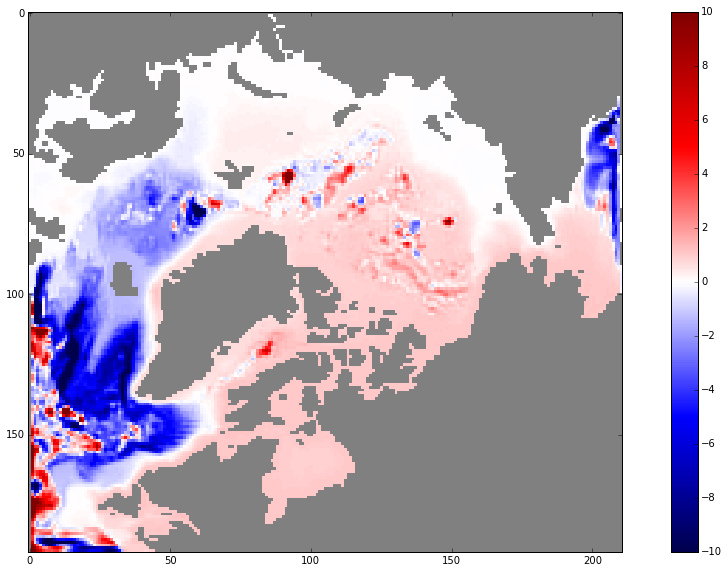

In [64]:
interact(np.nanmean(first_spinup.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the frist 55-60 years with nonscaled obcs with sponge on OBCS

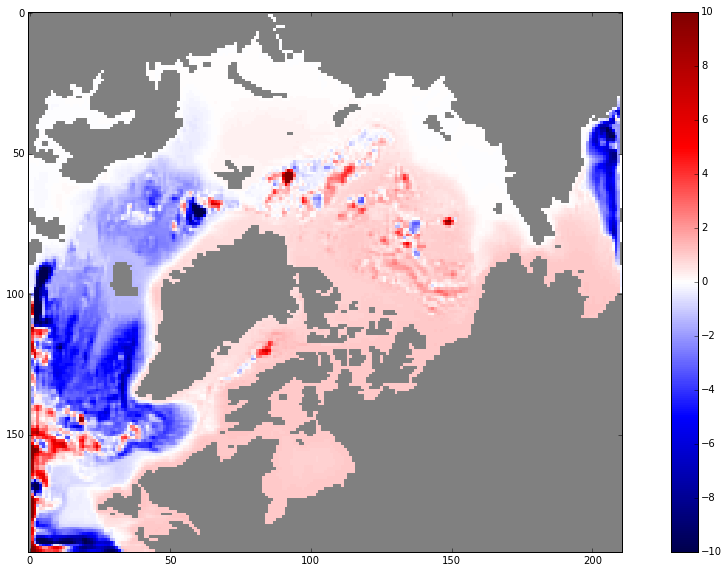

In [65]:
interact(np.nanmean(nonscaled_obcs_sponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the frist 55-60 years with sponge 1 month timescale and scaled OBCS

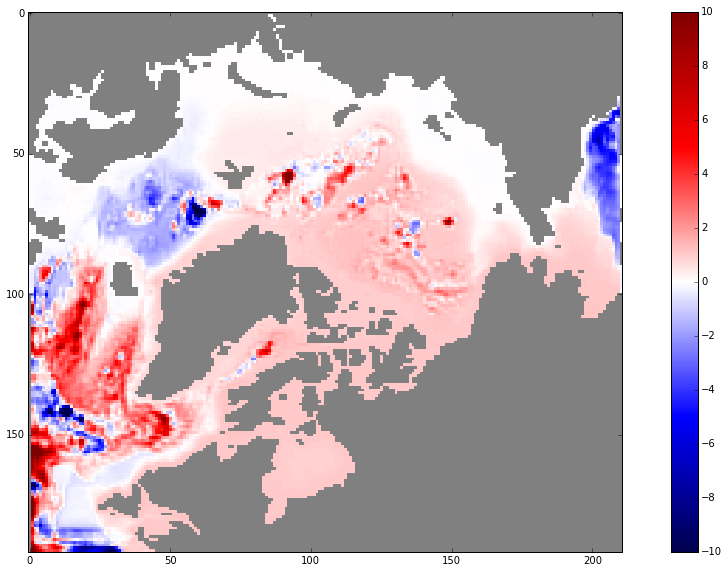

In [66]:
interact(np.nanmean(first_sponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the frist 55-60 years with sponge 1 year timescale and scaled OBCS

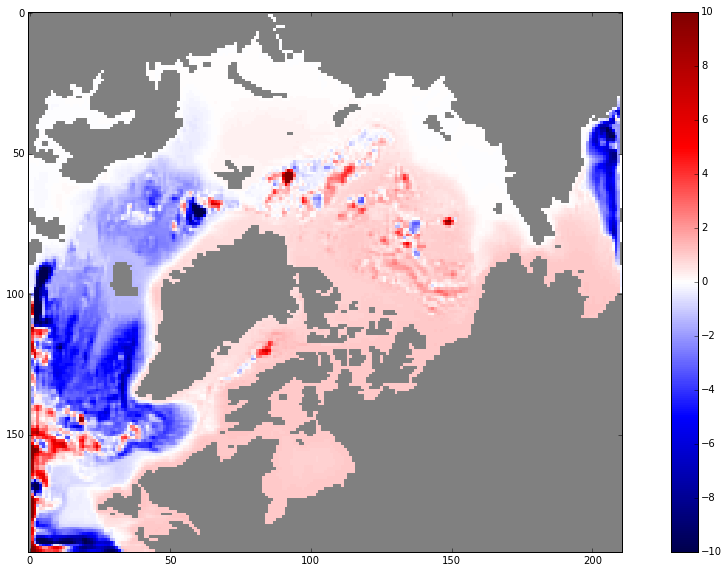

In [68]:
interact(np.nanmean(timescale_1year.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the difference between the first 20 years with no sponge and with sponge on OBCS

In [25]:
# Arctic Transects
# Barents Strait
barents = [77,-20,79,10]
# Fram Strait
fram = [80,-13,79,10]
# Bering Strait
bering = [64,-169,67,-168]
#Davis Strait
davis = [66,-61,66,-53]
# Arctic 1
arctic1 = [83,-28,74,136]
# Arctic 2
arctic2 = [71,-139,75,53]
# Arctic 3
arctic3 = [78,-115,76,111]
# Arctic 4
arctic4 = [60,180,60,0]

Fram strait

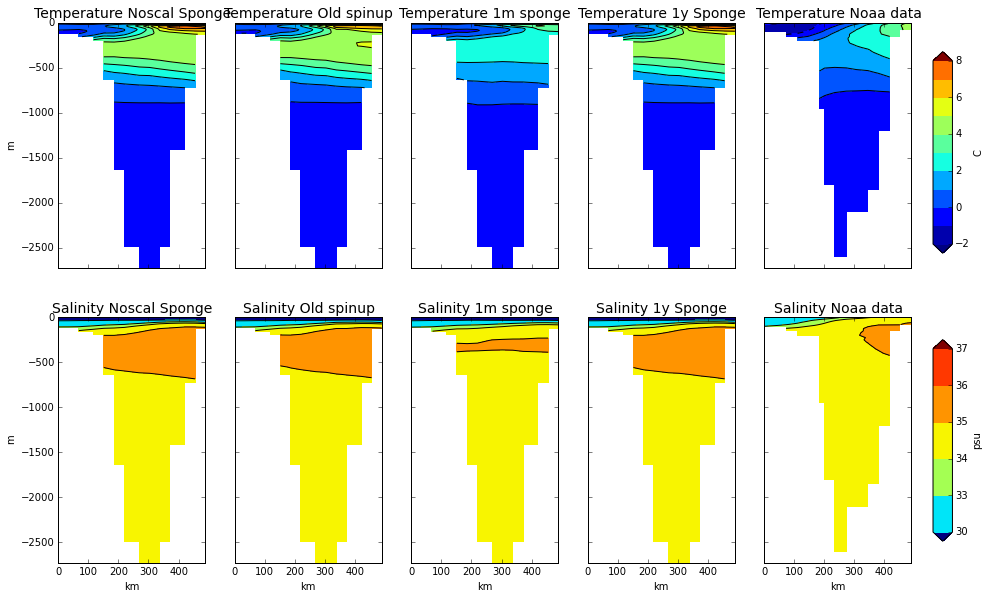

In [30]:
comp_plot(comp_data,fram)

Davis strait

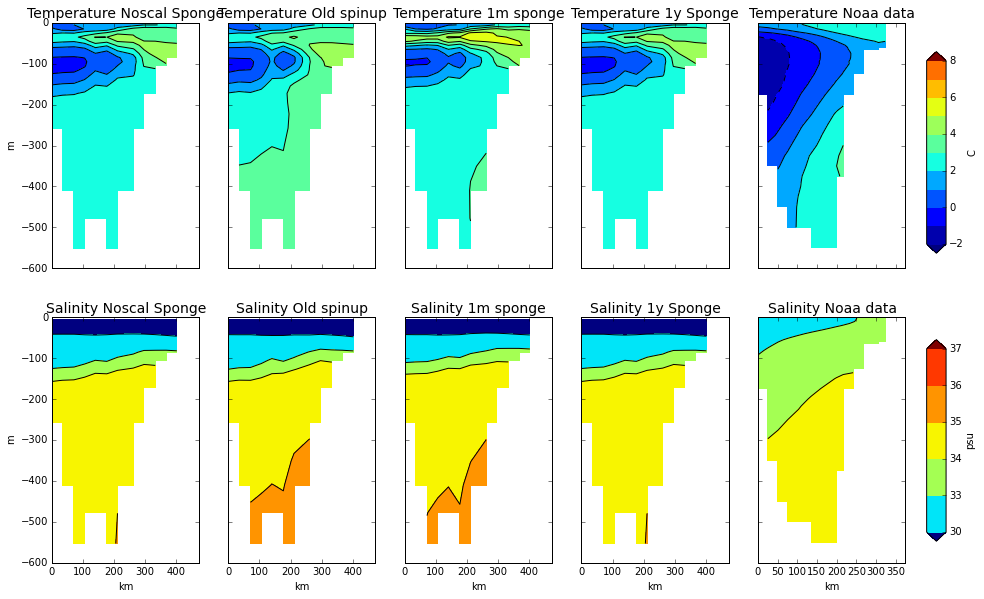

In [31]:
comp_plot(comp_data,davis)

Barents strait

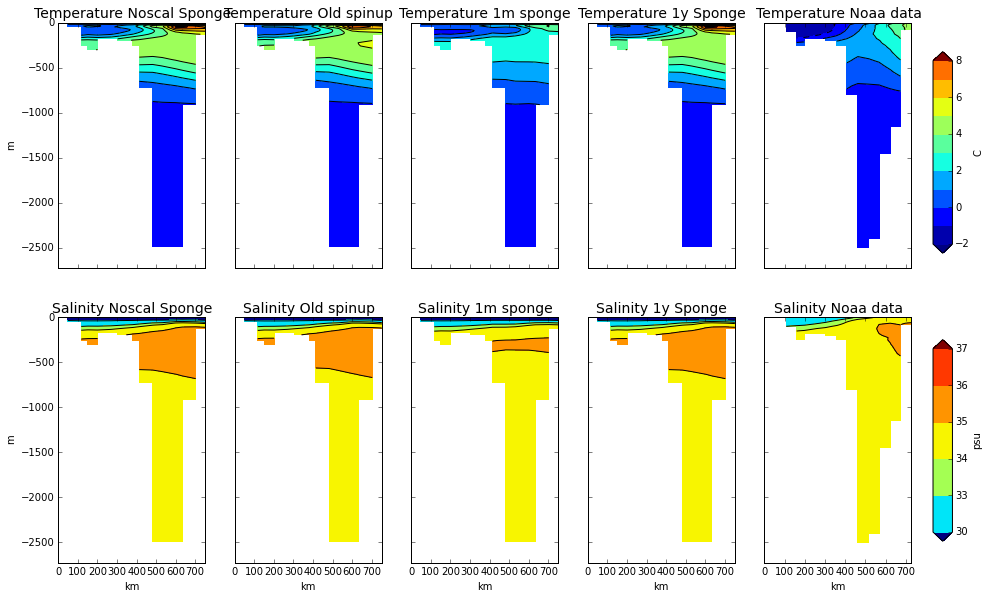

In [32]:
comp_plot(comp_data,barents)

Bering strait

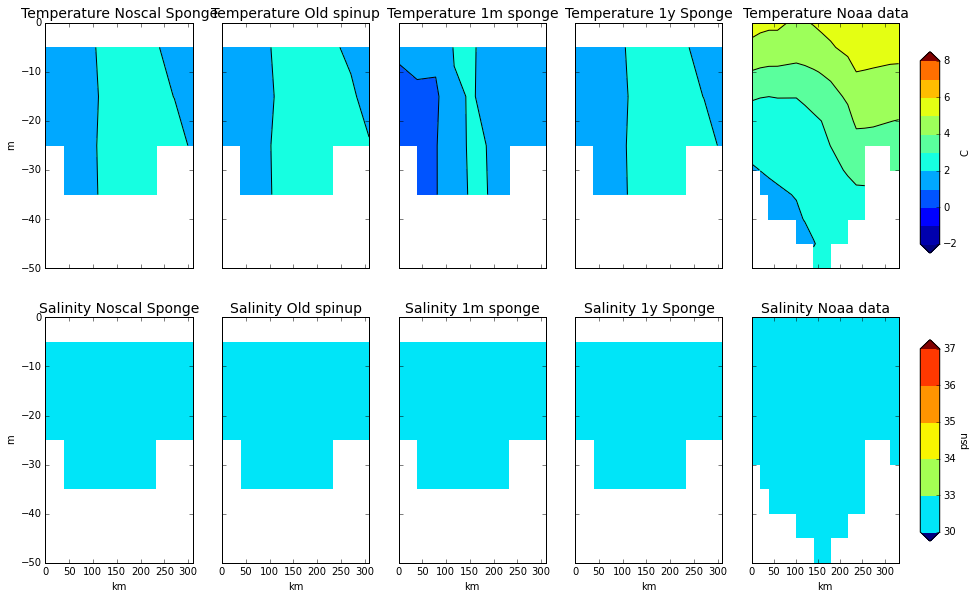

In [33]:
comp_plot(comp_data,bering)

Arctic 1

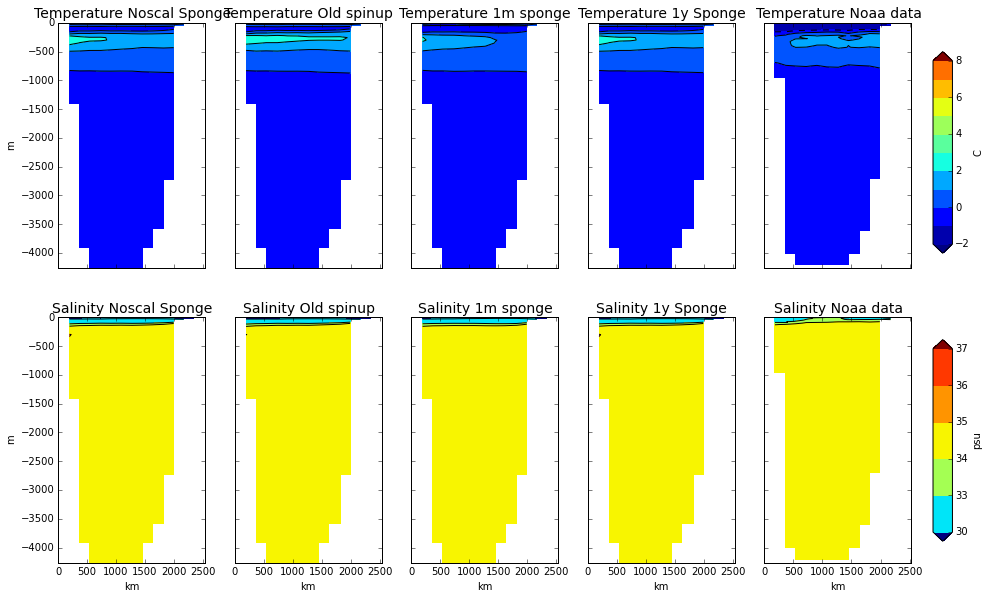

In [34]:
comp_plot(comp_data,arctic1)

In [11]:
liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }
core2 =  {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
             'Barents' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' : 0.99} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75}
            }
obs =   {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'0.8+/-0.2'} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'}
            }

In [12]:
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print 'spong ',sponge.totalFluxes[var]
    print 'nospo ',nosponge.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents
spong  {'Outflow': -0.84, 'Total flow': -0.26, 'Inflow': 0.59}
nospo  {'Outflow': -0.8, 'Total flow': -0.06, 'Inflow': 0.74}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
spong  {'Outflow': -1.09, 'Total flow': -1.07, 'Inflow': 0.02}
nospo  {'Outflow': -1.1, 'Total flow': -1.07, 'Inflow': 0.02}
liq10  {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Core2  {'Outflow': [], 'Total flow': 0.99, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '0.8+/-0.2', 'Inflow': []}
Fram
spong  {'Outflow': -1.07, 'Total flow': 0.38, 'Inflow': 1.45}
nospo  {'Outflow': -1.13, 'Total flow': 0.74, 'Inflow': 1.88}
liq10  {'Outflow': -5.5, 'Total flow': -1.6, 'Inflow': 3.9}
Core2  {'Outflow': [], 'Total flow': -1.95, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '-2.0+/-2.7', 'Inflow': []}
Davis
spong  {'Outflow': -2.12, 'Total flow': -0.25, 'Inflow': 1.

The density ρ of each box is given by ρ = ρ0 [1 − α(T −T0) + β (S −S0)]
(13)
where ρ0 = 1027.5 kgm−3 is a reference density, T0 = 5oC is a reference temperature, α = 0.0002 oC−1 and β = 0.0008 psu−1.
The

In [152]:
def rho(t,s):
    s0 = 35
    t0 = 5
    alpha = 0.0002
    beta = 0.0002
    rho0 = 1027.5
    return rho0*(1 - alpha*(t - t0) + beta*(s - s0))

In [44]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
run_36km.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('no sponge','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.title('sponge 1m timescale scaled obcs','red')

run_9km = MonitorRead()
run_9km.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.title('9 km started with new spin','green')

run_9km1 = MonitorRead()
run_9km1.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/resultsfirst/',[0])
run_9km1.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/resultsfirst/',[0])
run_9km1.title('9 km started with old spin','yellow')

In [45]:
run_sponge_noscaled = MonitorRead()
run_sponge_noscaled.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0])
run_sponge_noscaled.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0])
run_sponge_noscaled.title('sponge 1m timescale noscaled obcs','purple')

run_sponge_timescale = MonitorRead()
run_sponge_timescale.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.title('sponge 1y timescale scaled obcs','black')

In [153]:
run_36km.dataDyn['rho_mean'] = rho(run_36km.dataDyn['theta_lv_mean'],run_36km.dataDyn['salt_lv_mean'])
run_sponge.dataDyn['rho_mean'] = rho(run_sponge.dataDyn['theta_lv_mean'],run_sponge.dataDyn['salt_lv_mean'])
run_sponge_noscaled.dataDyn['rho_mean'] = rho(run_sponge_noscaled.dataDyn['theta_lv_mean'],run_sponge_noscaled.dataDyn['salt_lv_mean'])
run_sponge_timescale.dataDyn['rho_mean'] = rho(run_sponge_timescale.dataDyn['theta_lv_mean'],run_sponge_timescale.dataDyn['salt_lv_mean'])

In [138]:
titles_lv = { 'run_36km' : 'no sponge','run_18km' : 'run 18km' , 'run_9km' : 'run 9km' ,\
             'run_9km1' : 'run_9km1' , 'run_sponge' : 'run_sponge' , 'run_sponge_noscaled' : 'run_sponge_noscaled',\
            'run_sponge_timescale' : 'run_sponge_timescale'}
monitor_list1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge, 'run_sponge_noscaled' : run_sponge_noscaled ,\
                 'run_sponge_timescale' : run_sponge_timescale}

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


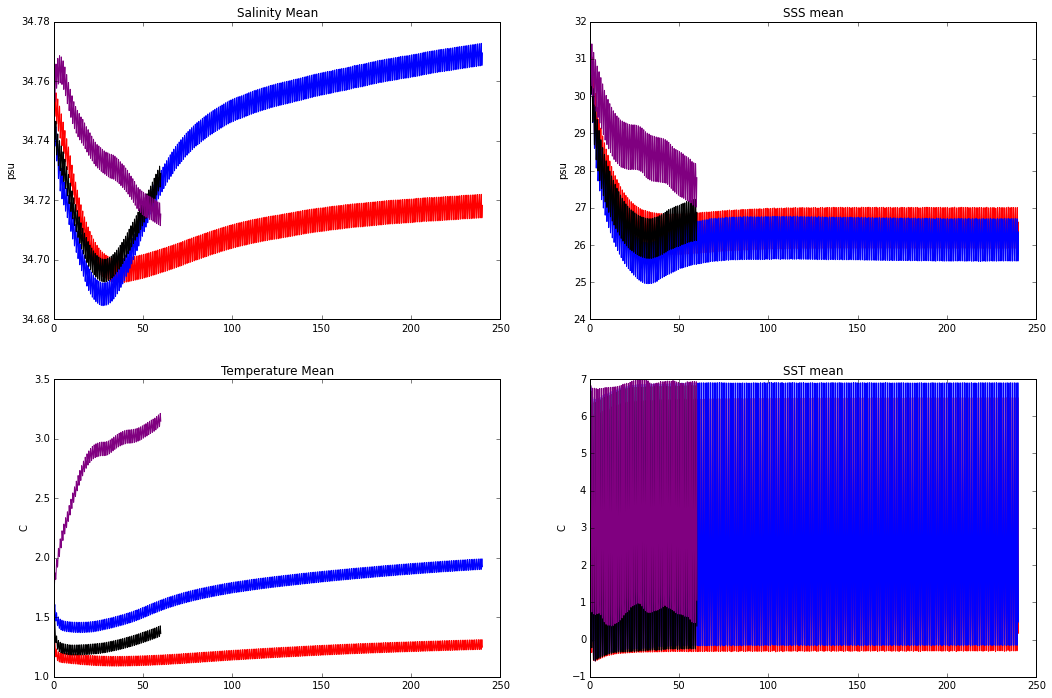

In [48]:
plot_monitor(monitor_list1,['salt_mean','sss_mean','theta_mean','sst_mean'])

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


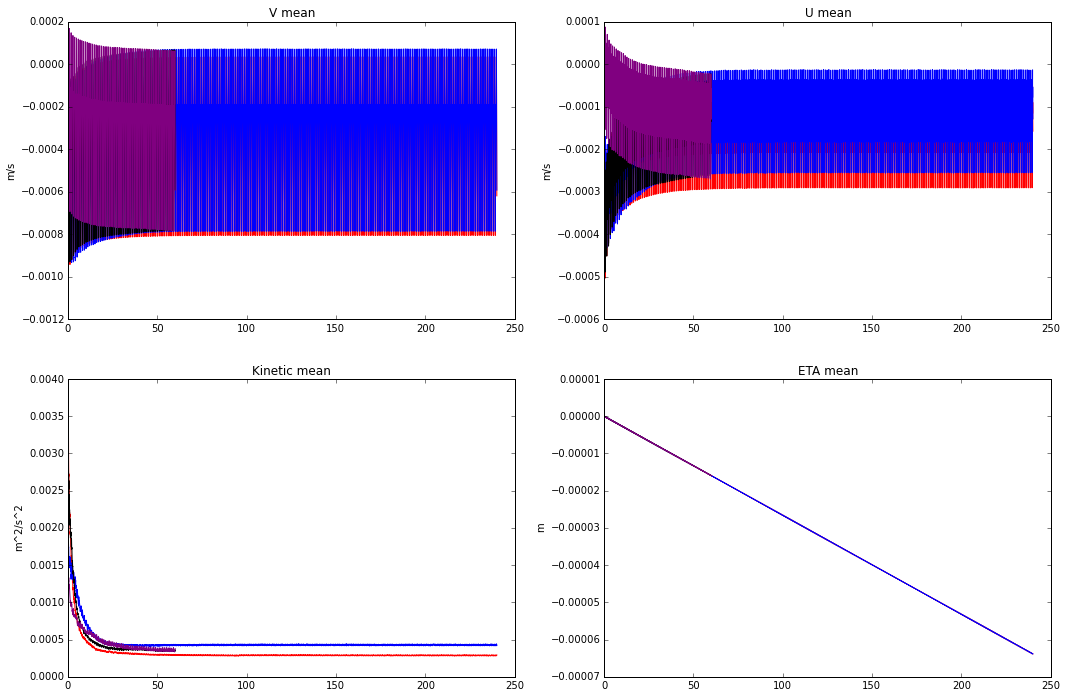

In [49]:
plot_monitor(monitor_list1,['vvel_mean','uvel_mean','ke_mean','eta_mean'])

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


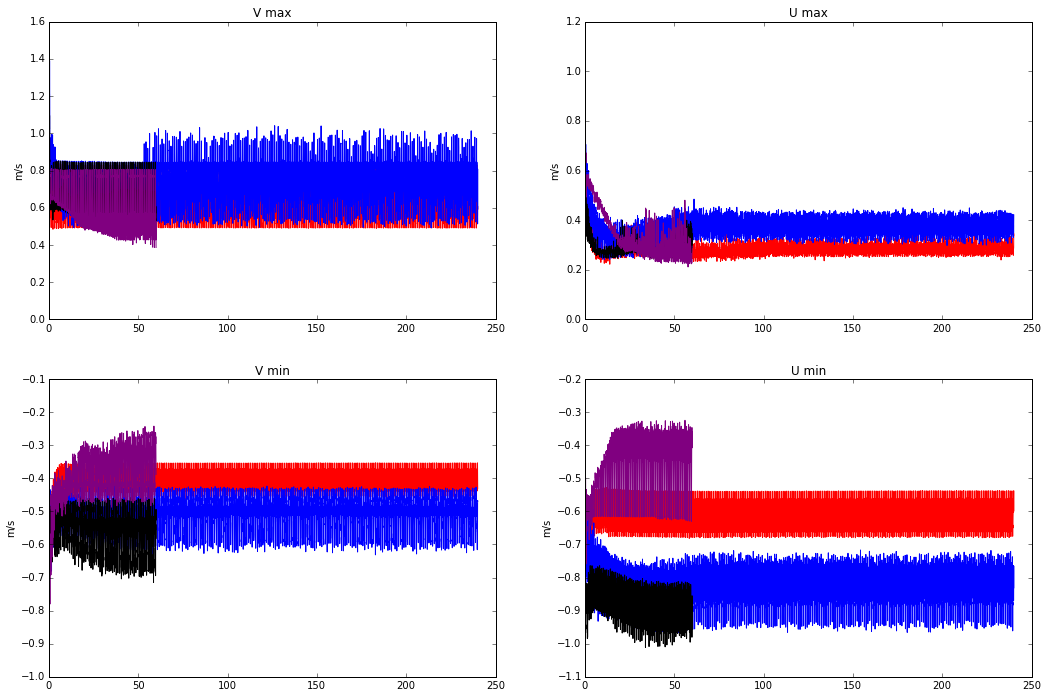

In [50]:
plot_monitor(monitor_list1,['vvel_max','uvel_max','vvel_min','uvel_min'])

sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


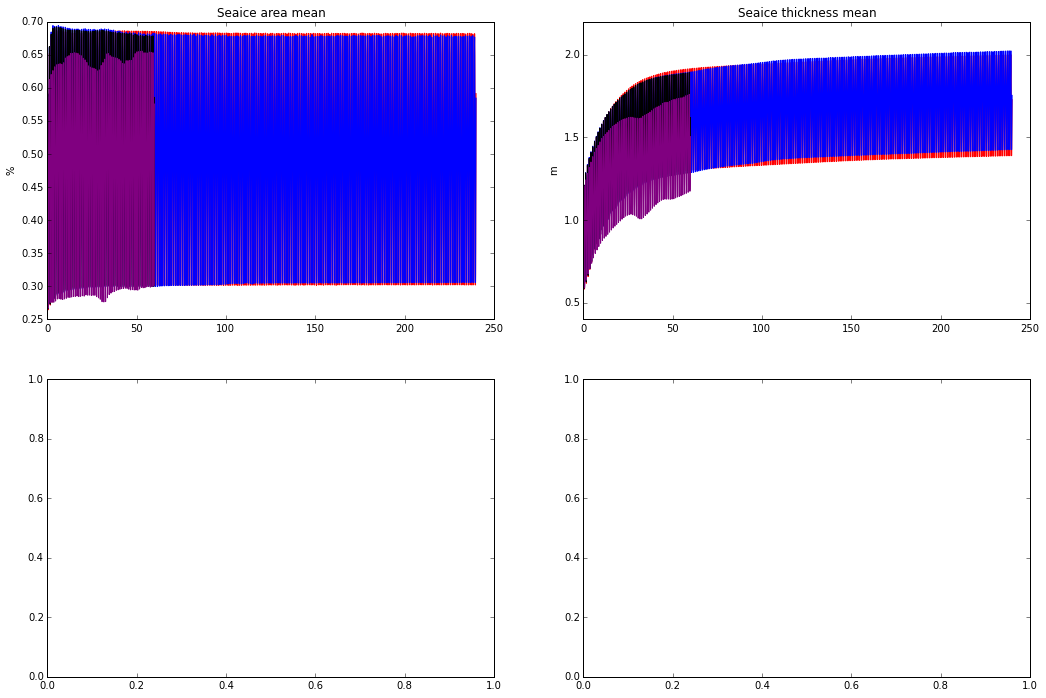

In [51]:
plot_monitor(monitor_list1,['seaice_area_mean','seaice_heff_mean'])

In [154]:
monitor_list1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge, 'run_sponge_noscaled' : run_sponge_noscaled ,\
                 'run_sponge_timescale' : run_sponge_timescale}

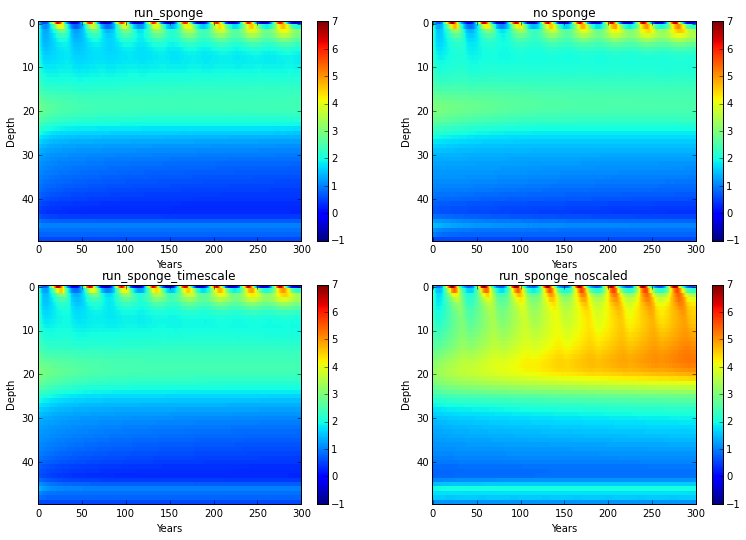

In [78]:
def plot_lv(monitor_list,var,vimin,vimax,cmap,row=2,col=2):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for mon in monitor_list:
        #print mon
        ca = axes.flat[ax_ind].imshow(monitor_list[mon].dataDyn[var][0:300,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title(titles_lv[mon])
        axes.flat[ax_ind].set_xlabel('Years')
        axes.flat[ax_ind].set_ylabel('Depth')
        ax_ind += 1
    fig.subplots_adjust(right=1.8,top=1.8)
plot_lv(monitor_list1,'theta_lv_mean',-1,7,matplotlib.cm.jet)

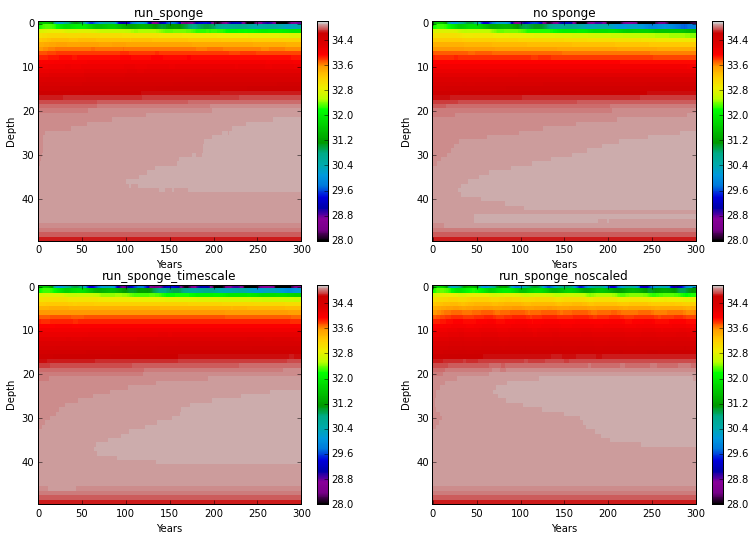

In [79]:
plot_lv(monitor_list1,'salt_lv_mean',28,35,matplotlib.cm.nipy_spectral)

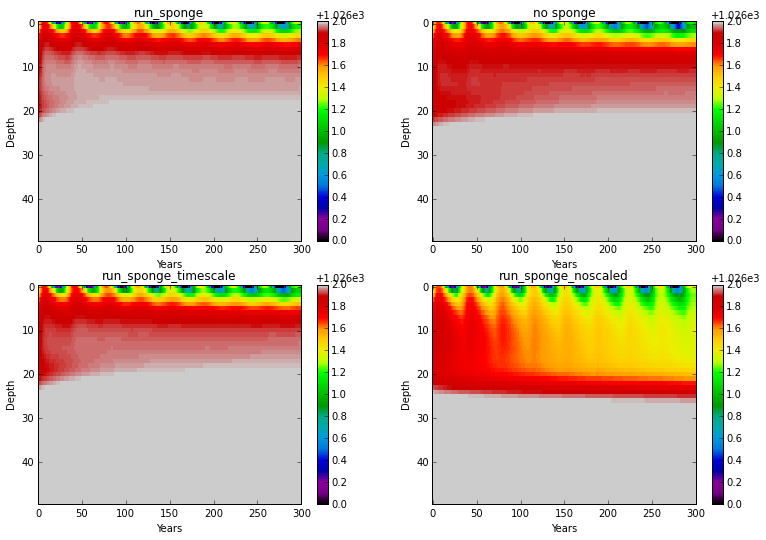

In [155]:
plot_lv(monitor_list1,'rho_mean',1026,1028,matplotlib.cm.nipy_spectral)

In [110]:
def read_datafiles(path,dataset):
    # This function is meant to read and store the forcing fields
    # Load adata files
    xdim = 320
    ydim = 160
    tdim = [365*4,366*4]
    tot_years = 33
    data = {'v10m': np.zeros(360*tot_years) , 'u10m' : np.zeros(360*tot_years), \
            'rain': np.zeros(360*tot_years) , 'dlw' : np.zeros(360*tot_years) , \
            'dsw' : np.zeros(360*tot_years) , 'tmp2m_degC' : np.zeros(360*tot_years) , \
            'spfh2m' : np.zeros(360*tot_years), 'rain': np.zeros(360*tot_years)}

    data_all = {'v10m': np.zeros(360*tot_years*4) , 'u10m' : np.zeros(360*tot_years*4), \
                'rain': np.zeros(360*tot_years*4) , 'dlw' : np.zeros(360*tot_years*4) , \
                'dsw' : np.zeros(360*tot_years*4) , 'tmp2m_degC' : np.zeros(360*tot_years*4) , \
                'spfh2m' : np.zeros(360*tot_years*4), 'rain': np.zeros(360*tot_years*4)}


    data_ave = {'v10m': np.zeros(360) , 'u10m' : np.zeros(360), 'rain': np.zeros(360), \
                'dlw' : np.zeros(360) , 'dsw' : np.zeros(360) , 'tmp2m_degC' : np.zeros(360) , \
                'spfh2m' : np.zeros(360), 'rain': np.zeros(360*33),}

    data_ave_all = {'v10m': np.zeros(360*4) , 'u10m' : np.zeros(360*4), 'rain': np.zeros(360*4), \
                'dlw' : np.zeros(360*4) , 'dsw' : np.zeros(360*4) , 'tmp2m_degC' : np.zeros(360*4) , \
                'spfh2m' : np.zeros(360*4), 'rain': np.zeros(360*4),}

    for var in data:
        data_av = []
        print "Now reading:"+str(var)
        for year in range(22):
            if (year+3)%4 == 0:
                tdim_ly = 1
                n_pop = 6
            else:
                tdim_ly = 0
                n_pop = 5      

            name = path+dataset+str(var)+'_'+str(1979+year)
            
            data_read = komod.mitbin(name,xdim=xdim,ydim=ydim,zdim=1,tdim=tdim[tdim_ly],datatype='float32')
            data_av_temp = np.mean(np.mean(data_read,axis = 3),axis = 2).squeeze(axis = 1)        
            to_pop = random.sample(range(len(data_av_temp)), 4*n_pop)
            data_av_temp = np.delete(data_av_temp,to_pop,0) 
            data_all[var]=data_av_temp
            # Daily average for plotting purpose
            data_av_temp_daily = np.zeros(360)
            for day in range(360):
                data_av_temp_daily[day] = np.mean(data_av_temp[day*4 : day*4 +4])
                
            data_av = np.concatenate([data_av,data_av_temp_daily])
            data[var] = data_av

        name = path+dataset+str(var)+'_average'
        data_read = komod.mitbin(name,xdim=xdim,ydim=ydim,zdim=1,tdim=360*4,datatype='float32')
        data_climy_av = np.mean(np.mean(data_read,axis = 3),axis = 2).squeeze(axis = 1)
        data_ave_all[var]=data_climy_av  
        data_climy_av_daily = np.zeros(360)
        for day in range(360):
            data_climy_av_daily[day] = np.mean(data_climy_av[day*4 : day*4 +4])

        data_climy_33_years = []
        for year in range(33):
            data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av_daily])

        data_ave[var] = data_climy_33_years
        
    clim = {'data' : data , 'data_all' : data_all , 'data_ave' : data_ave , 'data_ave_all' : data_ave_all}
        
    return clim
        
ERA = read_datafiles('/scratch/general/am8e13/ERA_data/','ERA40g_')
JRA = read_datafiles('/scratch/general/am8e13/cs_36km_tutorial/climdata/','jra25_')

Now reading:v10m
Now reading:dlw
Now reading:spfh2m
Now reading:u10m
Now reading:dsw
Now reading:tmp2m_degC
Now reading:rain
Now reading:v10m
Now reading:dlw
Now reading:spfh2m
Now reading:u10m
Now reading:dsw
Now reading:tmp2m_degC
Now reading:rain


In [111]:
titles = {'v10m': 'Meridional wind' , 'u10m' : 'Zonal wind', 'rain_new33': 'Precipitation new33', \
            'dlw' : 'Long wave radiation' , 'dsw' : 'Short wave radiation' , 'tmp2m_degC' : 'Temperature at 2m' , \
            'spfh2m' : 'Specific humidity at 2m', 'rain': 'Precipitation'}
unity = {'v10m': 'm/s' , 'u10m' : 'm/s', 'rain_new33': 'mm/day', \
            'dlw' : 'W/m2' , 'dsw' : 'W/m2' , 'tmp2m_degC' : 'C' , \
            'spfh2m' : 'kg/kg', 'rain': 'mm/day'}

ERA in black with average in red
JRA in blue with average in yellow


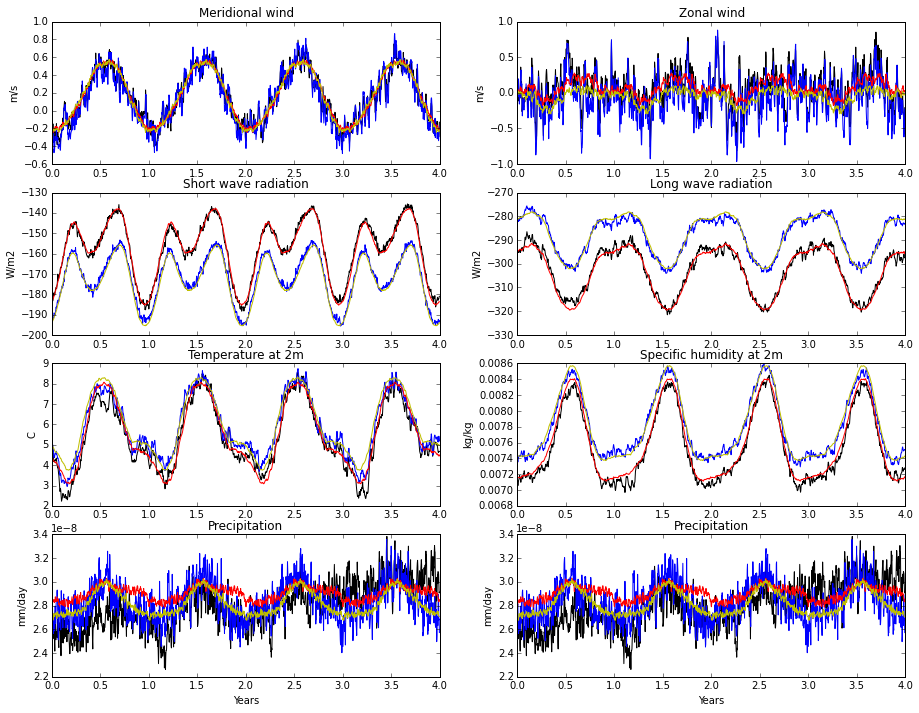

In [117]:
fig, axes = plt.subplots(4,2)
yp =4
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
#time_obcs= np.array(range(len(obcs_data['Eu'])))/12.

time = np.array(range(len(ERA['data']['v10m'])))/360.
for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'black')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'b')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'r')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'y')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in black with average in red'
print 'JRA in blue with average in yellow'
fig.subplots_adjust(right=2.1,top=2.4)

In [165]:
nonscaled_obcs = StateRead()
nonscaled_obcs.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[18*20,12*20+9])
nonscaled_obcs.seaiceread([12*20,12*20+6])
sponge = StateRead()
sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[18*20,18*20+9])
sponge.seaiceread([12*20,12*20+6])

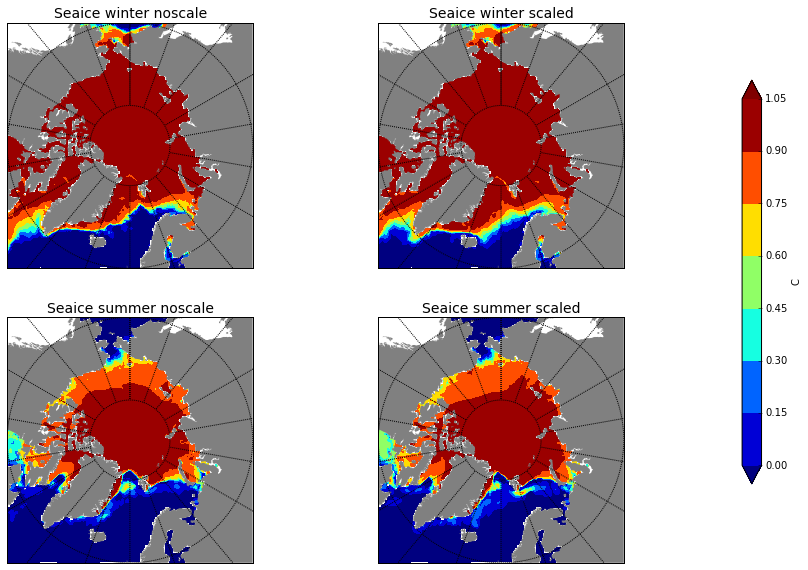

In [173]:
def plot_sst(data1,data2,data3,data4):
    vmin = 0
    vmax = 1
    tempbounds = range(vmin,vmax,2)

    cs = plt.contourf(nonscaled_obcs.seaice['SIarea'][0,0,:,:],vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    plt.colorbar(cs)
    plt.close()

    fig, ((ax1, ax2) , (ax3 ,ax4)) = plt.subplots(2,2)
    ax1 = plt.subplot(2,2,1)
    im1 = bp(nonscaled_obcs.lon, nonscaled_obcs.lat, nonscaled_obcs.seaice['SIarea'][0,0,:,:], yescbar = False,  vmin=vmin, vmax=vmax, level=tempbounds, extend='both')
    ax1.set_title('Seaice winter noscale')
    ax1.title.set_fontsize('14')

    ax2 = plt.subplot(2,2,2)
    im2 = bp(sponge.lon, sponge.lat, sponge.seaice['SIarea'][0,0,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax2.set_title('Seaice winter scaled')
    ax2.title.set_fontsize('14')

    ax3 = plt.subplot(2,2,3)
    im3 = bp(nonscaled_obcs.lon, nonscaled_obcs.lat, nonscaled_obcs.seaice['SIarea'][1,0,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax3.set_title('Seaice summer noscale')
    ax3.title.set_fontsize('14')

    ax4 = plt.subplot(2,2,4)
    im4 = bp(sponge.lon, sponge.lat, sponge.seaice['SIarea'][1,0,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax4.set_title('Seaice summer scaled')
    ax4.title.set_fontsize('14')

    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.set_ylabel('C')

    fig.subplots_adjust(right=1.7,top=2.)
plot_sst(1,1,1,1)

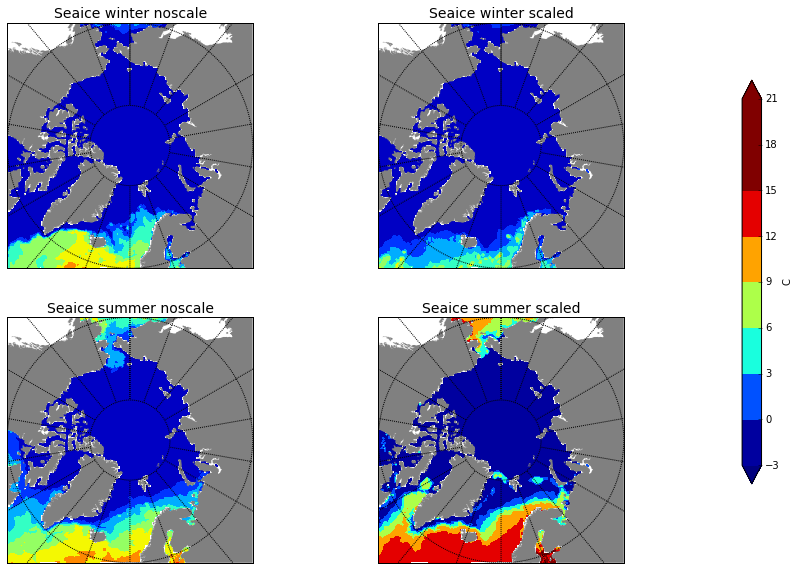

In [176]:
def plot_sst(data1,data2,data3,data4):
    vmin = -2
    vmax = 15
    tempbounds = range(vmin,vmax,2)

    cs = plt.contourf(nonscaled_obcs.data['T'][0,0,:,:],vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    plt.colorbar(cs)
    plt.close()

    fig, ((ax1, ax2) , (ax3 ,ax4)) = plt.subplots(2,2)
    ax1 = plt.subplot(2,2,1)
    im1 = bp(nonscaled_obcs.lon, nonscaled_obcs.lat, nonscaled_obcs.data['T'][0,0,:,:], yescbar = False,  vmin=vmin, vmax=vmax, level=tempbounds, extend='both')
    ax1.set_title('Temp winter noscale')
    ax1.title.set_fontsize('14')

    ax2 = plt.subplot(2,2,2)
    im2 = bp(sponge.lon, sponge.lat, sponge.data['T'][0,0,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax2.set_title('Temp winter scaled')
    ax2.title.set_fontsize('14')

    ax3 = plt.subplot(2,2,3)
    im3 = bp(nonscaled_obcs.lon, nonscaled_obcs.lat, nonscaled_obcs.data['T'][1,0,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax3.set_title('Temp summer noscale')
    ax3.title.set_fontsize('14')

    ax4 = plt.subplot(2,2,4)
    im4 = bp(sponge.lon, sponge.lat, sponge.data['T'][1,0,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax4.set_title('Temp summer scaled')
    ax4.title.set_fontsize('14')

    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.set_ylabel('C')

    fig.subplots_adjust(right=1.7,top=2.)
plot_sst(1,1,1,1)

In [162]:
obcs_no = Obcs()
obcs_no.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'',36)
obcs1 = Obcs()
obcs1.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod1',36)
obcs2 = Obcs()
obcs2.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
obcs3 = Obcs()
obcs3.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod3',36)

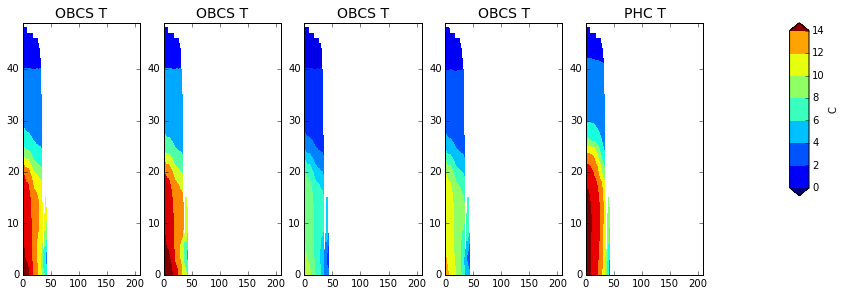

In [164]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,phc,loc='N',var='T',vmin=-1,vmax=18)

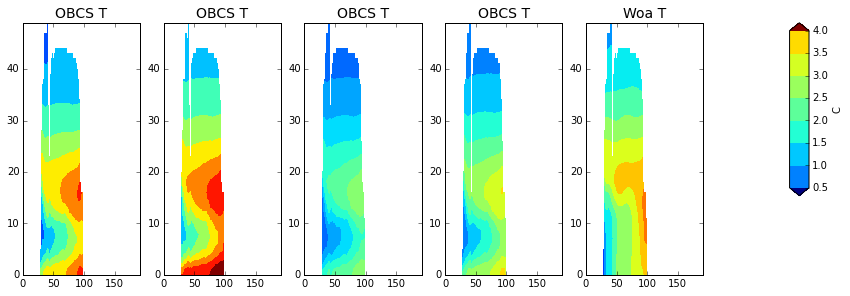

In [170]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,woa,loc='E',var='T',vmin=-1,vmax=6)

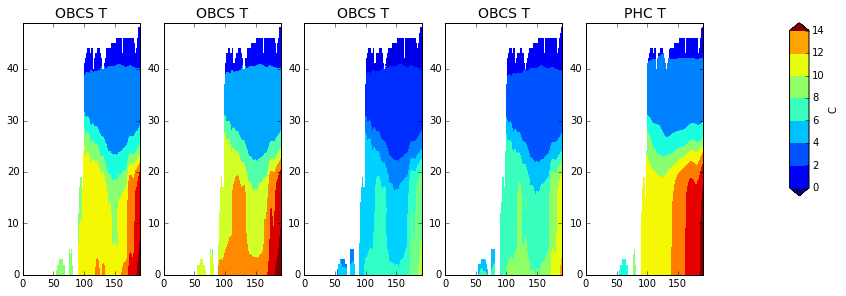

In [166]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,phc,loc='W',var='T',vmin=-1,vmax=18)